### Final Project Submission

 <li> Student Names: Calvine Dasilver
 <li> Student Pace: Full - Time
 <li> Scheduled Review Date/Time: 
 <li> Instructor's: Nikita Njoroge

## Utilizing Machine Learning to Assess Water Well Performance in Tanzania

# **Project Overview**

 ## <li>**Business Understanding**

 Millions in Tanzania face a daily struggle for clean water, forced to walk long distances for water of questionable quality. This water scarcity contributes to a cycle of illness, high infant mortality, and economic stagnation. Uneven water distribution due to Tanzania's diverse climate and geology, coupled with rising demand from agriculture, domestic needs, and other sectors, further complicates the issue. Water wells have been a lifeline for rural communities, but their effectiveness can vary. This project combines machine learning and data visualization to pinpoint potential causes of well failure, predict the success of new wells, and ensure resources are directed to areas with the greatest need.

##### **Challenges facing water access in Tanzania**:

* **Limited Infrastructure**: Tanzania lacks sufficient water infrastructure, particularly in rural areas. This includes a shortage of wells, pipelines, and proper sanitation facilities, leading to reliance on potentially contaminated sources.
* **Uneven Distribution**:  Tanzania's geography and climate create uneven water distribution. Some regions experience frequent droughts, while others have limited groundwater reserves. This disparity leaves many communities struggling despite national averages.
* **Water Quality**: Contaminated water sources are a significant health risk. Lack of proper sanitation and treatment facilities contribute to the spread of waterborne diseases, further impacting public health outcomes.
* **Climate Change**:  The increasing frequency and intensity of droughts due to climate change further exacerbate water scarcity. Erratic weather patterns disrupt traditional rainfall patterns, impacting both surface and groundwater availability.
* **Population Growth**: Tanzania's growing population puts increasing pressure on existing water resources. Rising demand for domestic and agricultural water use threatens to outpace sustainable management practices.
* **Funding and Management**: Insufficient funding for infrastructure development, maintenance, and water management programs limits progress

#### **Proposed Solution**

1. Build More & Smarter: Construct new wells and water systems (pumps, rainwater harvesting) in areas with greatest need, guided by data and community input.

2. Monitor & Maintain: Track water quality with sensors and mobile tech, while training locals on well maintenance and responsible water use.

3. Empower & Collaborate: Partner with local communities, NGOs, and the private sector to share knowledge, manage resources efficiently, and secure funding.

4. Sustainable Financing: Explore innovative funding models like microfinance, user fees, and public-private partnerships for long-term project viability.

#### **Conclusion**

This analysis pinpointed geographic location, construction details, environmental factors, and maintenance practices as crucial influences on well functionality.

#### **Problem Statement**

In rural Tanzania, there's not enough infrastructure for safe drinking water, making it hard for people to access. While the government and NGOs work together to build wells, there's a problem with making sure they keep working in the long run. As the wells start to break down, it slows down the efforts to make sure everyone has enough clean water.

#### **Objectives**
###### *main*
Implement a machine learning model to assess the operational status of water wells in Tanzania
###### *specific*
*  Data Preprocessing and Analysis
*  Model Development and Training
*  Insights Generation and Recommendation Development

## <li> **Data Understanding**
**Data Sources**

Data provided by Taarifa and the Tanzanian Ministry of Water is organized into three separate CSV files:
 https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/data/

1. **Test Set Values**: This file contains the independent variables (features) for which we need the model to predict the water well condition.
2. **Training Set Labels**: This file contains the dependent variable (status_group) for each row in the Training Set Values file. This variable represents the actual condition of the well (e.g., functional, non-functional, needs repair).
3. **Training Set Values**: This file contains the independent variables (features) used to train the machine learning model. These features will be used by the model to learn how to predict the condition of the wells in the Test Set Values file.

**To facilitate understanding of the data, a table outlining the column names and descriptions is provided below**:
* amount_tsh - Total static head (amount water available to waterpoint)
* date_recorded - The date the row was entered
*  funder - Who funded the well
*  gps_height - Altitude of the well
*  installer - Organization that installed the well
*  longitude - GPS coordinate
*  latitude - GPS coordinate
*  wpt_name - Name of the waterpoint if there is one
*  num_private -
*  basin - Geographic water basin
*  subvillage - Geographic location
*  region - Geographic location
*  region_code - Geographic location (coded)
*  district_code - Geographic location (coded)
*  lga - Geographic location
*  ward - Geographic location
*  population - Population around the well
*  public_meeting - True/False
*  recorded_by - Group entering this row of data
* scheme_management - Who operates the waterpoint
* scheme_name - Who operates the waterpoint
* permit - If the waterpoint is permitted
* construction_year - Year the waterpoint was constructed
* extraction_type - The kind of extraction the waterpoint uses
* extraction_type_group - The kind of extraction the waterpoint uses
* extraction_type_class - The kind of extraction the waterpoint uses
* management - How the waterpoint is managed
* management_group - How the waterpoint is managed
* payment - What the water costs
* payment_type - What the water costs
* water_quality - The quality of the water
* quality_group - The quality of the water
* quantity - The quantity of water
* quantity_group - The quantity of water
* source - The source of the water
* source_type - The source of the water
* source_class - The source of the water
* waterpoint_type - The kind of waterpoint
* waterpoint_type_group - The kind of waterpoint


### Importing relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


First, I will define a fuction that loads the Datasets and check for info and shape of the datasets.


In [2]:
#create a function that loads data and gets the info about the dataset
def load_data_and_check_info(file_path):
    """
    Load data from a CSV file and get information about the DataFrame.

    Parameters:
    - file_path (str): Path to the CSV file.

    Returns:
    - df_info (str): Information about the DataFrame.
    """
    # Load data
    df_1 = pd.read_csv(file_path, index_col='id')

    # Display the first few rows of the DataFrame
    df_head = df_1.head()

    # Get information about the DataFrame
    df_info = df_1.info()

    # Get the shape of the DataFrame
    df_shape = df_1.shape

    print("Data Shape:", df_shape)

    return df_1,df_info, df_head, df_shape

Second, I will create a fuction for checking data types and missing values

In [3]:
def check_data_types_and_missing_values(data):
    
    # Display data types of each column
    data_types = data.dtypes.replace({'object': 'string'}).value_counts().to_dict()
    
    # Check for missing values
    missing_values = data.isnull().sum()
    
    return {"data_types": data_types, "missing_values": missing_values}


#### 1.1 Importing Training Data: We begin by loading the 'Training Set Values' dataset

In [4]:
file_path_1 = "Data\Training_set_values.csv"  # Replace "your_data.csv" with the actual file path
df_1,df_info, df_head , df_shape= load_data_and_check_info(file_path_1)
print("Shape of the DataFrame:", df_shape)
print(df_info)
print("\nFirst few rows of the DataFrame:")
df_head #data_head

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 69572 to 26348
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   date_recorded          59400 non-null  object 
 2   funder                 55765 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   installer              55745 non-null  object 
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   wpt_name               59400 non-null  object 
 8   num_private            59400 non-null  int64  
 9   basin                  59400 non-null  object 
 10  subvillage             59029 non-null  object 
 11  region                 59400 non-null  object 
 12  region_code            59400 non-null  int64  
 13  district_code          59400 non-null  int64  
 14  lga                    59400 non-null  object 
 15

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe



The summary of the observation indicates;

* Data Type: pandas.core.frame.DataFrame
* Number of Rows: 59400
* Number of Columns: 39

In [5]:
#check the data types and missing values of DataFrame columns in our training set values.
dtypes_and_mv_df_1 = check_data_types_and_missing_values(df_1)
print("Data types of each column:")
print(dtypes_and_mv_df_1["data_types"])
if dtypes_and_mv_df_1["missing_values"].sum() == 0:
      print("\nNo missing values found.")
else:
      print("\nMissing values:")
      print(dtypes_and_mv_df_1["missing_values"])

Data types of each column:
{'string': 30, dtype('int64'): 6, dtype('float64'): 3}

Missing values:
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
pa

Key points from data exploration:

* Data types: Mostly text (30 columns), with some integers (6) and floats (3) likely representing categories or continuous values.
* Missing values: Encouragingly, no missing entries in crucial data (amount spent, location, population). However, several others have missing values (>3000 entries) in areas like funders, installers, and management.


#### 1.2 We are loading the 'Training set labels' dataset







In [6]:
#loading dataset
file_path_2 = "Data\Training _set_labels.csv"  # Replace "your_data.csv" with the actual file path
df_2,df_info, df_head , df_shape= load_data_and_check_info(file_path_2)
print("Shape of the DataFrame:", df_shape)
print(df_info)
print("\nFirst few rows of the DataFrame:")
df_head #data_head

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 69572 to 26348
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   status_group  59400 non-null  object
dtypes: object(1)
memory usage: 928.1+ KB
Data Shape: (59400, 1)
Shape of the DataFrame: (59400, 1)
None

First few rows of the DataFrame:


,status_group
id,
69572,functional
8776,functional
34310,functional
67743,non functional
19728,functional


This summary reveals:

* Data Type: pandas.core.frame.DataFrame
* Number of Rows: 59400
* Number of Columns: 1 (single column)
* Column Name: "status_group" (likely contains labels indicating well condition)
* Sample Values: The preview shows examples of values in the "status_group" column, including "functional" and "non functional" (potential labels for well condition).
* Overall, this seems to be the target DataFrame containing labels for well functionality, which will likely be crucial for training our machine learning model.

In [7]:
#check the data types and missing values of DataFrame columns in our training set labels
dtypes_and_mv_df_2 = check_data_types_and_missing_values(df_2)
print("Data types of each column:")
print(dtypes_and_mv_df_2["data_types"])
if dtypes_and_mv_df_2["missing_values"].sum() == 0:
      print("\nNo missing values found.")
else:
      print("\nMissing values:")
      print(dtypes_and_mv_df_2["missing_values"])

Data types of each column:
{'string': 1}

No missing values found.


observation review:
* Data Type: All columns in our DataFrame are of type 'string'. This suggests they likely contain textual data.
* Missing Values: There are no missing values found in any of the columns. This is a positive aspect, indicating a complete dataset for our analysis.



#### 1.3 Loading Test Data: 'Test Set Values' 

In [8]:
file_path_3 = "Data\Test_set_values.csv"  # Replace "your_data.csv" with the actual file path
df_3,df_info, df_head , df_shape= load_data_and_check_info(file_path_3)
print("Shape of the DataFrame:", df_shape)
print(df_info)
print("\nFirst few rows of the DataFrame:")
df_head #data_head

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14850 entries, 50785 to 68707
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             14850 non-null  float64
 1   date_recorded          14850 non-null  object 
 2   funder                 13981 non-null  object 
 3   gps_height             14850 non-null  int64  
 4   installer              13973 non-null  object 
 5   longitude              14850 non-null  float64
 6   latitude               14850 non-null  float64
 7   wpt_name               14850 non-null  object 
 8   num_private            14850 non-null  int64  
 9   basin                  14850 non-null  object 
 10  subvillage             14751 non-null  object 
 11  region                 14850 non-null  object 
 12  region_code            14850 non-null  int64  
 13  district_code          14850 non-null  int64  
 14  lga                    14850 non-null  object 
 15

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,NaN,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,NaN,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,NaN,GeoData Consultants Ltd,VWC,NaN,True,1987,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,NaN,GeoData Consultants Ltd,Water Board,BRUDER,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


The summary of the observation indicates;

* Data Type: pandas.core.frame.DataFrame
* Number of Rows: 14,850
* Number of Columns: 39

In [9]:
#check the data types and missing values of DataFrame columns in our training set values.
dtypes_and_mv_df_3 = check_data_types_and_missing_values(df_3)
print("Data types of each column:")
print(dtypes_and_mv_df_3["data_types"])
if dtypes_and_mv_df_3["missing_values"].sum() == 0:
      print("\nNo missing values found.")
else:
      print("\nMissing values:")
      print(dtypes_and_mv_df_3["missing_values"])

Data types of each column:
{'string': 30, dtype('int64'): 6, dtype('float64'): 3}

Missing values:
amount_tsh                  0
date_recorded               0
funder                    869
gps_height                  0
installer                 877
longitude                   0
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
subvillage                 99
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting            821
recorded_by                 0
scheme_management         969
scheme_name              7092
permit                    737
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
w

This summary shows data types and missing values. Most data is text (30 columns), with some numbers (6) and decimals (3). While key data like amount spent and location have no missing entries, some others (funders, installers, etc.) have over 800 missing values.

In conclusion, from our 3 datasets,the 'training set values' likely has labels for well condition (e.g., functional/non-functional) to train the model, while the 'test set values' lacks these labels for the model to predict. They likely have the same features describing the wells, but the training set might be larger for effective learning.

## <li> **Data Preposing and Analysis**

###  **Data Preparation (Data Blending)**

#### 2.1Merging the training set values and training set labels Datasets


In [10]:
# merging the training set values and training set labels on the 'id' column
try:
    merged_df = pd.merge(df_1, df_2, on='id')
    print(merged_df.head())
except Exception as e:
    print("An error occurred during the merge operation:", e)


       amount_tsh date_recorded  ... waterpoint_type_group    status_group
id                               ...                                      
69572      6000.0    2011-03-14  ...    communal standpipe      functional
8776          0.0    2013-03-06  ...    communal standpipe      functional
34310        25.0    2013-02-25  ...    communal standpipe      functional
67743         0.0    2013-01-28  ...    communal standpipe  non functional
19728         0.0    2011-07-13  ...    communal standpipe      functional

[5 rows x 40 columns]


In [11]:
#checking for the shape and information about the new dataset
def check_shape_and_info(data):
    print("Shape of the DataFrame:", data.shape)
    print(data.info())
    return data


In [12]:
merged_df = check_shape_and_info(merged_df)
merged_df.head()

Shape of the DataFrame: (59400, 40)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 69572 to 26348
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   date_recorded          59400 non-null  object 
 2   funder                 55765 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   installer              55745 non-null  object 
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   wpt_name               59400 non-null  object 
 8   num_private            59400 non-null  int64  
 9   basin                  59400 non-null  object 
 10  subvillage             59029 non-null  object 
 11  region                 59400 non-null  object 
 12  region_code            59400 non-null  int64  
 13  district_code          59400 non-null  int64  
 14  lga           

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


#### 2.2 Data Cleaning
##### a) Dimensionality Reduction

To enhance the model's performance, we can leverage feature selection techniques. By analyzing feature descriptions from the above **df**, we can identify features that likely have minimal impact on predicting well condition. These features will be removed from the DataFrame to create a more streamlined dataset for model training. The specific features targeted for removal include:
* funder - Who funded the well
* date_recorded - The date the row was entered
* recorded_by - Group entering this row of data
* wpt_name - Name of the waterpoint if there is one
* installer - Organization that installed the well


In [13]:
#dropping the columns that are not needed in the dataset
merged_df.drop(['funder', 'installer', 'date_recorded', 'recorded_by', 'wpt_name',], axis=1, inplace=True)
merged_df.head()

,amount_tsh,gps_height,longitude,latitude,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,1390,34.938093,-9.856322,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
8776,0.0,1399,34.698766,-2.147466,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
34310,25.0,686,37.460664,-3.821329,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
67743,0.0,263,38.486161,-11.155298,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
19728,0.0,0,31.130847,-1.825359,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [14]:
#checking for the shape and information about the new dataset
merged_df = check_shape_and_info(merged_df)
merged_df.head()

Shape of the DataFrame: (59400, 35)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 69572 to 26348
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   gps_height             59400 non-null  int64  
 2   longitude              59400 non-null  float64
 3   latitude               59400 non-null  float64
 4   num_private            59400 non-null  int64  
 5   basin                  59400 non-null  object 
 6   subvillage             59029 non-null  object 
 7   region                 59400 non-null  object 
 8   region_code            59400 non-null  int64  
 9   district_code          59400 non-null  int64  
 10  lga                    59400 non-null  object 
 11  ward                   59400 non-null  object 
 12  population             59400 non-null  int64  
 13  public_meeting         56066 non-null  object 
 14  scheme_managem

,amount_tsh,gps_height,longitude,latitude,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,1390,34.938093,-9.856322,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
8776,0.0,1399,34.698766,-2.147466,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
34310,25.0,686,37.460664,-3.821329,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
67743,0.0,263,38.486161,-11.155298,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
19728,0.0,0,31.130847,-1.825359,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


 *The 5 features have been dropped as per the number of columns in the current dataframe.*

In reviewing the data, I've identified columns with similar names. To ensure data integrity and optimize the DataFrame structure, I will conduct further analysis to determine if these columns contain identical values. If duplicates are found, we can safely remove them, resulting in a more concise and efficient DataFrame for further analysis. The columns I will investigate for potential duplication include:

- extraction_type - The kind of extraction the waterpoint uses
- extraction_type_group - The kind of extraction the waterpoint uses
- extraction_type_class - The kind of extraction the waterpoint uses


<li> source - The source of the water
<li> source_type - The source of the water
<li> source_class - The source of the water


- waterpoint_type - The kind of waterpoint
- waterpoint_type_group - The kind of waterpoint


<li> scheme_management - Who operates the waterpoint
<li> scheme_name - Who operates the waterpoint
<li> management - How the waterpoint is managed
<LI> management_group - How the waterpoint is managed


- payment - What the water costs
- payment_type - What the water costs


<li> quantity - The quantity of water
<li> quantity_group - The quantity of water


- water_quality - The quality of the water
- quality_group - The quality of the water


Let's create a function that takes a dataset as input and returns a dictionary. This dictionary should contain information about the unique values in each column. Specifically, for each column, the function should tell me the number of unique values and list the unique values themselves

In [15]:
def check_unique(l):
    for i in l:
        print("Feature Name:", i)
        print("Number of Unique Values:", len(merged_df[i].unique()))
        print("Unique Values:", merged_df[i].unique())
        print('\n')

Let's start by investigating the first set of features with similar names to assess potential duplication.


In [16]:
columns_1 = ['extraction_type', 'extraction_type_group', 'extraction_type_class']

check_unique(columns_1)

Feature Name: extraction_type
Number of Unique Values: 18
Unique Values: ['gravity' 'submersible' 'swn 80' 'nira/tanira' 'india mark ii' 'other'
 'ksb' 'mono' 'windmill' 'afridev' 'other - rope pump' 'india mark iii'
 'other - swn 81' 'other - play pump' 'cemo' 'climax' 'walimi'
 'other - mkulima/shinyanga']


Feature Name: extraction_type_group
Number of Unique Values: 13
Unique Values: ['gravity' 'submersible' 'swn 80' 'nira/tanira' 'india mark ii' 'other'
 'mono' 'wind-powered' 'afridev' 'rope pump' 'india mark iii'
 'other handpump' 'other motorpump']


Feature Name: extraction_type_class
Number of Unique Values: 7
Unique Values: ['gravity' 'submersible' 'handpump' 'other' 'motorpump' 'wind-powered'
 'rope pump']




Since "extraction_type" and "extraction_type_group" contain the same information as the more general "extraction_type_class", we can drop them to avoid redundancy. This will streamline our data and make our model more efficient.

In [17]:
#dropping "extraction_type" and "extraction_type_group" columns
merged_df.drop(['extraction_type', 'extraction_type_group'], axis=1, inplace=True)

Second set of features with similar names to assess potential duplication.


In [18]:
columns_2 = ['source', 'source_type', 'source_class']

check_unique(columns_2)

Feature Name: source
Number of Unique Values: 10
Unique Values: ['spring' 'rainwater harvesting' 'dam' 'machine dbh' 'other'
 'shallow well' 'river' 'hand dtw' 'lake' 'unknown']


Feature Name: source_type
Number of Unique Values: 7
Unique Values: ['spring' 'rainwater harvesting' 'dam' 'borehole' 'other' 'shallow well'
 'river/lake']


Feature Name: source_class
Number of Unique Values: 3
Unique Values: ['groundwater' 'surface' 'unknown']




All three features describe the water source, but "source_class" provides the broadest categories. While "source" offers more detailed sub-categories (10 unique options), these sub-categories seem distinct from those in the other two features. Therefore, to avoid redundancy and capture the most informative details, we'll keep "source" and remove the other two features with less informative, potentially overlapping categories.

In [19]:
# dropping "source_type" and "source_class" columns

merged_df.drop(['source_type', 'source_class'], axis=1, inplace=True)


Third set of features with similar names to assess potential duplication.

In [20]:
columns_3 = ['waterpoint_type', 'waterpoint_type_group']

check_unique(columns_3)

Feature Name: waterpoint_type
Number of Unique Values: 7
Unique Values: ['communal standpipe' 'communal standpipe multiple' 'hand pump' 'other'
 'improved spring' 'cattle trough' 'dam']


Feature Name: waterpoint_type_group
Number of Unique Values: 6
Unique Values: ['communal standpipe' 'hand pump' 'other' 'improved spring'
 'cattle trough' 'dam']




Waterpoint_type" offers slightly more detail than "waterpoint_type_group" with an additional category for 'communal standpipe multiple'. However, to avoid redundancy in our model, we'll keep the more concise "waterpoint_type_group".


In [21]:
#dropping "waterpoint_type" column
merged_df.drop(['waterpoint_type'], axis=1, inplace=True)


Fourth set of features with similar names to assess potential duplication.

In [22]:
columns_4 = ['scheme_management', 'scheme_name', 'management', 'management_group']

check_unique(columns_4)

Feature Name: scheme_management
Number of Unique Values: 13
Unique Values: ['VWC' 'Other' nan 'Private operator' 'WUG' 'Water Board' 'WUA'
 'Water authority' 'Company' 'Parastatal' 'Trust' 'SWC' 'None']


Feature Name: scheme_name
Number of Unique Values: 2697
Unique Values: ['Roman' nan 'Nyumba ya mungu pipe scheme' ... 'BL Nsherehehe'
 'Magati  gravity spri' 'Mtawanya']


Feature Name: management
Number of Unique Values: 12
Unique Values: ['vwc' 'wug' 'other' 'private operator' 'water board' 'wua' 'company'
 'water authority' 'parastatal' 'unknown' 'other - school' 'trust']


Feature Name: management_group
Number of Unique Values: 5
Unique Values: ['user-group' 'other' 'commercial' 'parastatal' 'unknown']




"Scheme_management" and "management" have similar information, but "management" uses a clearer representation for missing values ("unknown" instead of "nan" and "None"). Additionally, "scheme_name" has too many categories (2697) to be useful for the model. Finally, "management_group" seems redundant since its details are already captured as sub-categories within "management". By dropping these features, we can create a cleaner and more efficient dataset for building our model.

In [23]:
#dropping "scheme_management", "scheme_name" and "management_group" columns

merged_df.drop(['scheme_management', 'scheme_name', 'management_group'], axis=1, inplace=True)


Fifth set of features with similar names to assess potential duplication.

In [24]:
columns_5 = ['payment', 'payment_type']

check_unique(columns_5)

Feature Name: payment
Number of Unique Values: 7
Unique Values: ['pay annually' 'never pay' 'pay per bucket' 'unknown'
 'pay when scheme fails' 'other' 'pay monthly']


Feature Name: payment_type
Number of Unique Values: 7
Unique Values: ['annually' 'never pay' 'per bucket' 'unknown' 'on failure' 'other'
 'monthly']




"Payment_type" and "payment" are redundant (same values). We'll keep "payment_type" for brevity.

In [25]:
#dropping "payment" column
merged_df.drop(['payment'], axis=1, inplace=True)


Sixth set of features with similar names to assess potential duplication.

In [26]:
columns_6 = ['quantity', 'quantity_group']

check_unique(columns_6)

Feature Name: quantity
Number of Unique Values: 5
Unique Values: ['enough' 'insufficient' 'dry' 'seasonal' 'unknown']


Feature Name: quantity_group
Number of Unique Values: 5
Unique Values: ['enough' 'insufficient' 'dry' 'seasonal' 'unknown']




These two features also have similar values. We will keep "quantity" and remove "quantity_group".


In [27]:
#droping "quantity_group" column

merged_df.drop(['quantity_group'], axis=1, inplace=True)


last set of features with similar names to assess potential duplication.

In [28]:
columns_7 = ['water_quality', 'quality_group']

check_unique(columns_7)

Feature Name: water_quality
Number of Unique Values: 8
Unique Values: ['soft' 'salty' 'milky' 'unknown' 'fluoride' 'coloured' 'salty abandoned'
 'fluoride abandoned']


Feature Name: quality_group
Number of Unique Values: 6
Unique Values: ['good' 'salty' 'milky' 'unknown' 'fluoride' 'colored']




"Water_quality" offers more informative categories, including "salty abandoned" and "fluoride abandoned" which could be crucial for our model. We'll keep "water_quality" and remove the less detailed "quality_group".


In [29]:
#dropping "quality_group" column

merged_df.drop(['quality_group'], axis=1, inplace=True)


To optimize our model, let's explore reducing the number of features containing location data (currently 9). We can start by examining the number of unique values within each feature to identify potential redundancy.

In [30]:
geo_columns = ['longitude', 'latitude', 'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward']

check_unique(geo_columns)

Feature Name: longitude
Number of Unique Values: 57516
Unique Values: [34.93809275 34.6987661  37.46066446 ... 34.01708706 35.86131531
 38.10404822]


Feature Name: latitude
Number of Unique Values: 57517
Unique Values: [-9.85632177 -2.14746569 -3.82132853 ... -8.75043433 -6.37857327
 -6.74746425]


Feature Name: basin
Number of Unique Values: 9
Unique Values: ['Lake Nyasa' 'Lake Victoria' 'Pangani' 'Ruvuma / Southern Coast'
 'Internal' 'Lake Tanganyika' 'Wami / Ruvu' 'Rufiji' 'Lake Rukwa']


Feature Name: subvillage
Number of Unique Values: 19288
Unique Values: ['Mnyusi B' 'Nyamara' 'Majengo' ... 'Itete B' 'Maore Kati' 'Kikatanyemba']


Feature Name: region
Number of Unique Values: 21
Unique Values: ['Iringa' 'Mara' 'Manyara' 'Mtwara' 'Kagera' 'Tanga' 'Shinyanga' 'Tabora'
 'Pwani' 'Ruvuma' 'Kilimanjaro' 'Rukwa' 'Mwanza' 'Kigoma' 'Lindi' 'Dodoma'
 'Arusha' 'Mbeya' 'Singida' 'Morogoro' 'Dar es Salaam']


Feature Name: region_code
Number of Unique Values: 27
Unique Values: [11 20 21 90 1

Based on our analysis, features like "longitude", "latitude", "subvillage", "lga", and "ward" have a very high number of unique categories. Since these features represent very specific locations, they likely won't generalize well to classify well status across a broader area. To improve model efficiency, we'll remove these features.

In [31]:
#dropping 'lga','latitude', 'subvillage', 'ward','longitude'

merged_df.drop(['lga','latitude', 'subvillage', 'ward','longitude'], axis=1, inplace=True)


Keeping "basin" and "district_code" for broader location context, ditching "region_code" (redundant of "region").

In [32]:
#dropping 'region_code' column
merged_df.drop(['region_code'], axis=1, inplace=True)

# checking the remaining number of columns
len(merged_df.columns)

18

In [33]:
#checking for the shape and information about the new dataset
merged_df = check_shape_and_info(merged_df)
merged_df.head()

Shape of the DataFrame: (59400, 18)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 69572 to 26348
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   gps_height             59400 non-null  int64  
 2   num_private            59400 non-null  int64  
 3   basin                  59400 non-null  object 
 4   region                 59400 non-null  object 
 5   district_code          59400 non-null  int64  
 6   population             59400 non-null  int64  
 7   public_meeting         56066 non-null  object 
 8   permit                 56344 non-null  object 
 9   construction_year      59400 non-null  int64  
 10  extraction_type_class  59400 non-null  object 
 11  management             59400 non-null  object 
 12  payment_type           59400 non-null  object 
 13  water_quality          59400 non-null  object 
 14  quantity      

,amount_tsh,gps_height,num_private,basin,region,district_code,population,public_meeting,permit,construction_year,extraction_type_class,management,payment_type,water_quality,quantity,source,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,
69572,6000.0,1390,0,Lake Nyasa,Iringa,5,109,True,False,1999,gravity,vwc,annually,soft,enough,spring,communal standpipe,functional
8776,0.0,1399,0,Lake Victoria,Mara,2,280,NaN,True,2010,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional
34310,25.0,686,0,Pangani,Manyara,4,250,True,True,2009,gravity,vwc,per bucket,soft,enough,dam,communal standpipe,functional
67743,0.0,263,0,Ruvuma / Southern Coast,Mtwara,63,58,True,True,1986,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe,non functional
19728,0.0,0,0,Lake Victoria,Kagera,1,0,True,True,0,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,functional


##### **checking for missing values, outliers and correlation in our new dataset from the merged dataframe after merging and performing dimensionality reduction**

##### b) Missing Values

In [34]:
#checking for missing values
check_data_types_and_missing_values(merged_df)


{'data_types': {'string': 12, dtype('int64'): 5, dtype('float64'): 1},
 'missing_values': amount_tsh                  0
 gps_height                  0
 num_private                 0
 basin                       0
 region                      0
 district_code               0
 population                  0
 public_meeting           3334
 permit                   3056
 construction_year           0
 extraction_type_class       0
 management                  0
 payment_type                0
 water_quality               0
 quantity                    0
 source                      0
 waterpoint_type_group       0
 status_group                0
 dtype: int64}

"The features 'public_meeting' and 'permit' contain missing data.

Now,let's fix the missing values in 'public_meeting' and 'permit' with the most frequent value (mode) in each category.

In [35]:
#removing the missing values
# For categorical variables
categorical_columns = ['public_meeting', 'permit']
for col in categorical_columns:
    mode_value = merged_df[col].mode()[0]
    merged_df[col].fillna(mode_value, inplace=True)

missing_values_after_imputation = merged_df.isnull().sum()
print("Missing values after imputation:\n", missing_values_after_imputation)


Missing values after imputation:
 amount_tsh               0
gps_height               0
num_private              0
basin                    0
region                   0
district_code            0
population               0
public_meeting           0
permit                   0
construction_year        0
extraction_type_class    0
management               0
payment_type             0
water_quality            0
quantity                 0
source                   0
waterpoint_type_group    0
status_group             0
dtype: int64


From the output observation our new dataset has no missing value.

##### c) Outliers
To identify potential outliers in our features, we'll analyze their distributions using 5-point summaries and visualize them with boxplots.

In [36]:
merged_df.describe()

,amount_tsh,gps_height,num_private,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,317.650385,668.297239,0.474141,5.629747,179.909983,1300.652475
std,2997.574558,693.116350,12.236230,9.633649,471.482176,951.620547
min,0.000000,-90.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,0.000000,369.000000,0.000000,3.000000,25.000000,1986.000000
75%,20.000000,1319.250000,0.000000,5.000000,215.000000,2004.000000
max,350000.000000,2770.000000,1776.000000,80.000000,30500.000000,2013.000000


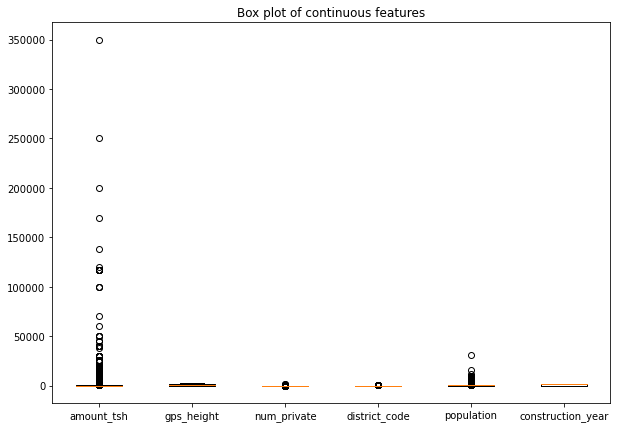

In [37]:
#list of Features with Continuous Data Types

continuous_features = ['amount_tsh', 'gps_height', 'num_private', 'district_code', 'population', 'construction_year']


# Creating boxplots for features with continuous data types
plt.figure(figsize=(10, 7))
plt.boxplot([merged_df[col] for col in continuous_features], labels=continuous_features)
plt.title("Box plot of continuous features")
plt.show()

    


The boxplots and 5-point summaries reveal positive outliers in "amount_tsh", "num_private", and "population". These outliers can affect model performance and preprocessing steps. To address this, we can consider capping outliers to the upper bound of the interquartile range (IQR) instead of replacing them entirely. This approach retains more data while mitigating the influence of extreme values.

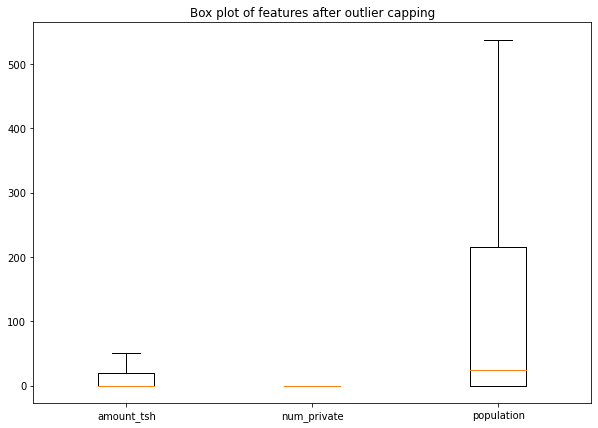

In [38]:
# Define the features with positive outliers
outlier_features = ['amount_tsh', 'num_private', 'population']

# Define a function to cap outliers
def cap_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    df.loc[df[feature] > upper_bound, feature] = upper_bound

# Apply outlier capping to specified features
for feature in outlier_features:
    cap_outliers(merged_df, feature)

# Plot boxplots after outlier capping
plt.figure(figsize=(10, 7))
plt.boxplot([merged_df[col] for col in outlier_features], labels=outlier_features)
plt.title("Box plot of features after outlier capping")
plt.show()


Outlier values have been modified as part of the data cleaning process

##### d) correlation analysis 

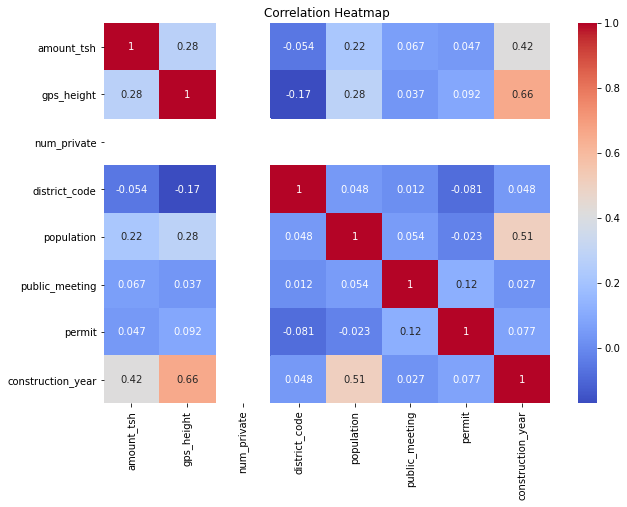

In [39]:
#checking correlation using a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(merged_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


From our observation, we can note there's no feature(s) to be dropped further because no feature(s) is 75% correlated to another feature, therefore we will keep all our features to be used to train our model.

##  <li>**More of Exploratory Data Analysis**

In [40]:
merged_df.head()

,amount_tsh,gps_height,num_private,basin,region,district_code,population,public_meeting,permit,construction_year,extraction_type_class,management,payment_type,water_quality,quantity,source,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,
69572,50.0,1390,0.0,Lake Nyasa,Iringa,5,109.0,True,False,1999,gravity,vwc,annually,soft,enough,spring,communal standpipe,functional
8776,0.0,1399,0.0,Lake Victoria,Mara,2,280.0,True,True,2010,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional
34310,25.0,686,0.0,Pangani,Manyara,4,250.0,True,True,2009,gravity,vwc,per bucket,soft,enough,dam,communal standpipe,functional
67743,0.0,263,0.0,Ruvuma / Southern Coast,Mtwara,63,58.0,True,True,1986,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe,non functional
19728,0.0,0,0.0,Lake Victoria,Kagera,1,0.0,True,True,0,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,functional


   #### 1.  **Univariate Analysis**

Let's delve into the data by examining individual variables!
In this process, called univariate analysis, we'll focus on one variable at a time. Our goal is to uncover patterns within each variable's distribution. We'll begin by exploring categorical variables, where data falls into distinct categories, and then move on to numerical variables that hold continuous values.

##### 1.1 Exploring Distributions of Categorical Variables

**status_group** : Is our **target variable**.This variable indicates the operational status of a water point, categorized as functional, non-functional, or functional but requiring repairs.

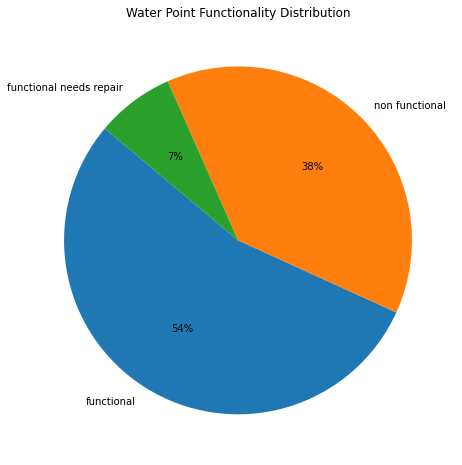

In [41]:
#pie chart for status_group
fig, ax = plt.subplots(figsize=(12, 8))
status_counts = merged_df['status_group'].value_counts()
wedges, texts, autotexts = ax.pie(status_counts, labels=status_counts.index, autopct="%d%%", startangle=140)
ax.set(title="Water Point Functionality Distribution")
plt.setp(texts, color='black')  # Set text color to black
plt.show()




From our observation,54% of waterpoints are functional, 38% are non-functional, 7% are functional and need repair

In [42]:
#function that desplays bar charts of the categorical features
def bar_chart(feature):
    plt.figure(figsize=(10, 6))
    plt.bar(merged_df[feature].value_counts().index, merged_df[feature].value_counts())
    plt.title(f"Bar chart of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.xticks(rotation=90)
    plt.show()

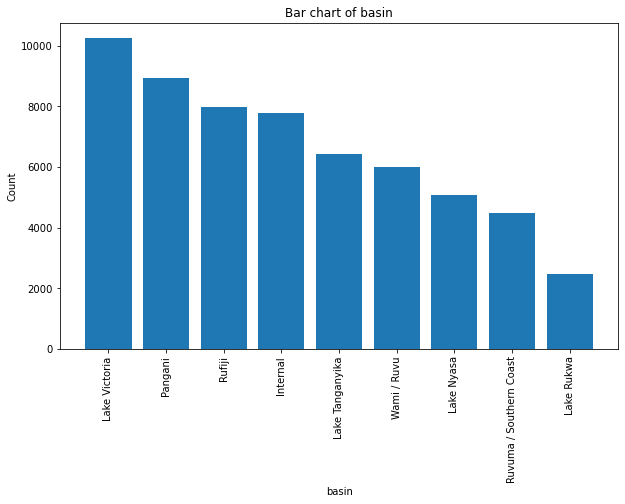

In [43]:
bar_chart('basin')

Lake victoria is the primary source of water for most waterpoints, followed by Pangani basin .

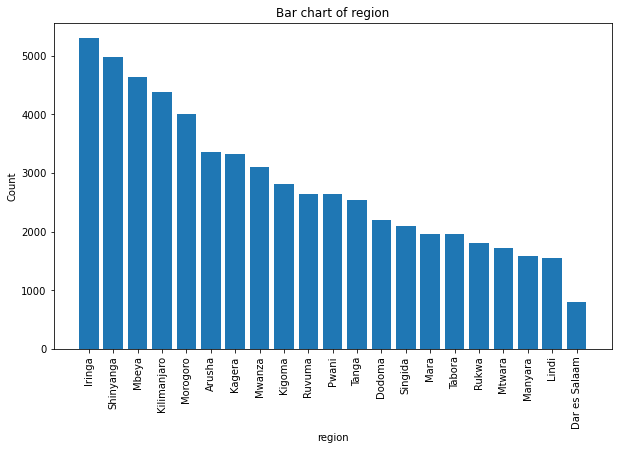

In [44]:
bar_chart('region')

Waterpoints are most concentrated in Iringa, Shinyanga, Mbeya, Kilimanjaro, and Morogoro, ranking them as the top 5 regions.

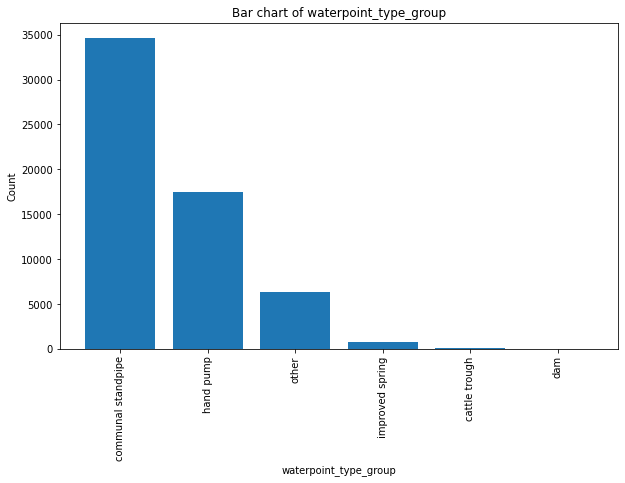

In [45]:
bar_chart('waterpoint_type_group')

Over half of the waterpoints are communal standpipes, with handpumps being another common type

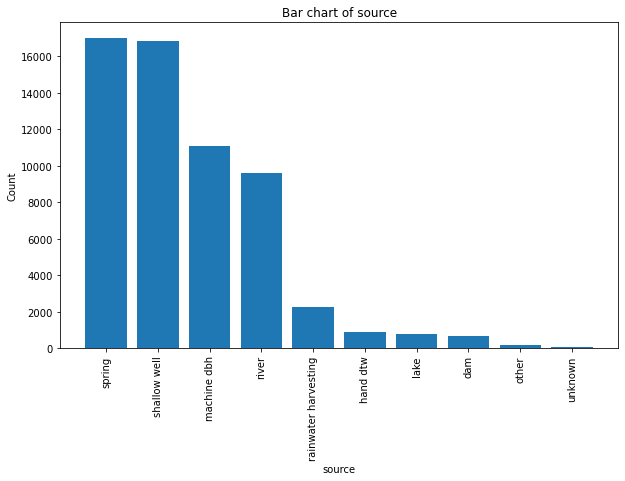

In [46]:
bar_chart('source')

Waterpoints utilize a diverse range of water sources, with springs being the most prevalent, followed by shallow wells, machine dbh, rivers, rainwater harvesting, and dams.

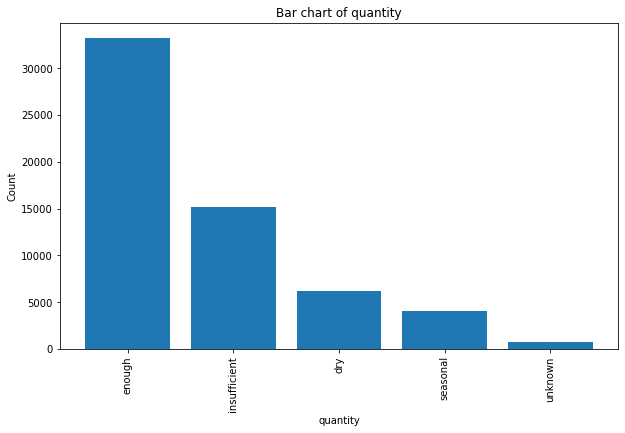

In [47]:
bar_chart('quantity')

Enough water is the most common availability status for waterpoints. However, some waterpoints experience insufficient water, dryness, seasonal fluctuations, or have unknown water quantities.

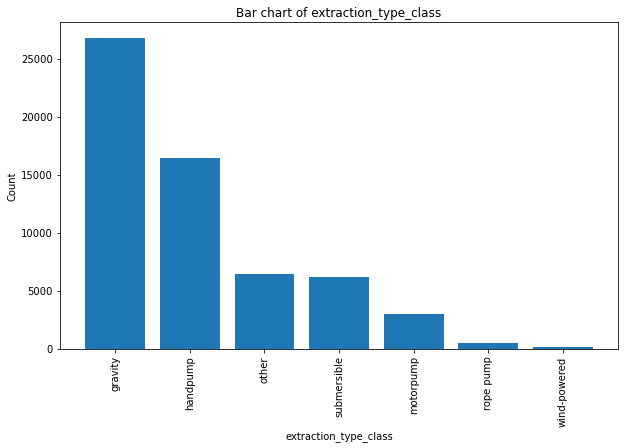

In [48]:
bar_chart('extraction_type_class')

Gravity-powered pumps are the dominant choice for waterpoints, likely due to the land's topography. Hand pumps follow closely, suggesting a focus on cost-effectiveness. Wind-powered pumps are the least common option.

##### 1.2 Exploring Distributions of Numerical Variables

In [49]:
#function that desplays density plots of the continuous features
def density_plot(feature):
    plt.figure(figsize=(10, 6))
    sns.kdeplot(merged_df[feature], shade=True)
    plt.title(f"Density plot of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.show()

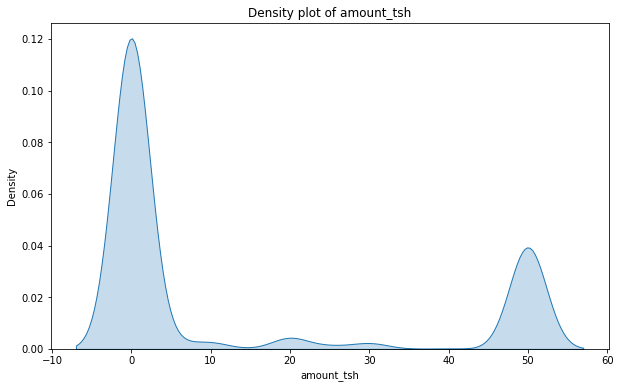

In [50]:
density_plot('amount_tsh')

Total static head at waterpoints show bi-modal distribution.most values cluster in two zones : between -10 and 10, and 40 and 60 .

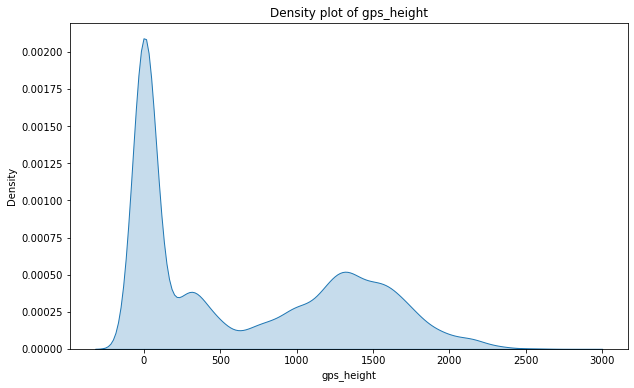

In [51]:
density_plot('gps_height')

 Well distribution seems similar for all conditions, with a slight twist. Most values cluster in two zones: between - and 500, and between 500 and 2000, suggesting a bi-modal distribution.

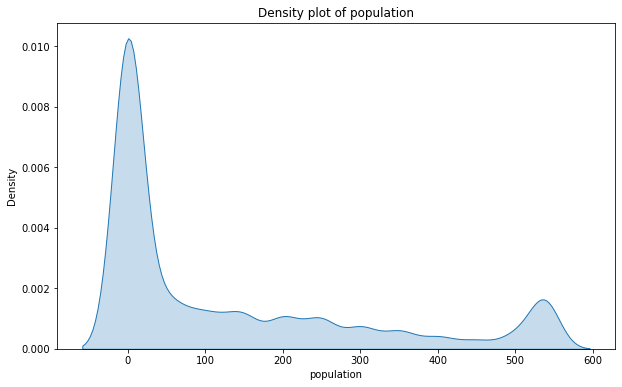

In [52]:
density_plot('population')

Based on the density plot of population,the distribution of the population around waterpoints are concentrated below 100, with a possible outlier between 500 and 600.

#### 2. Bivariate Analysis

In this section, we delve into the relationships between the variables in our data. We will employ various statistical techniques to analyze how these variables interact and influence each other. This analysis aims to answer specific research questions formulated earlier, allowing us to gain deeper insights into the underlying patterns and dynamics within the data.

##### a) Is there a correlation between the amount of water available at a waterpoint and the functionality of its pump?

In [53]:
#function 
def count_plot(data, column, hue=None, palette="bright"):
    plt.figure(figsize=(12,6))
    sns.countplot(x=column,data=data,hue=hue,order = data[column].value_counts().index)
    plt.title(f"{column} count plot")
    plt.ylabel('Count')
    plt.xticks(rotation = 45)
    plt.show()

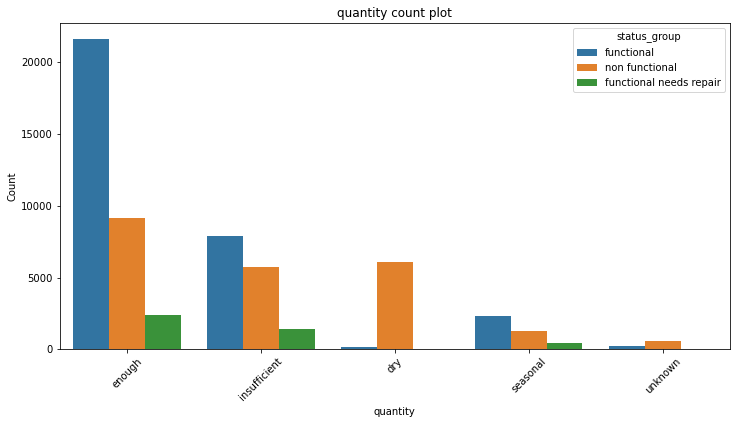

In [54]:
count_plot(merged_df, 'quantity', hue='status_group',palette="bright")

Our analysis reveals a clear link between water availability and waterpoint functionality.  Waterpoints with sufficient water, indicated by likely high discharge rates, boast significantly higher percentages of functional pumps. In contrast, waterpoints struggling with insufficient water supplies have very few functional pumps, highlighting the critical role water availability plays in ensuring a waterpoint's ability to serve the community.

##### b) Could the regional variations in factors like water quality, climate, or infrastructure influence the functionality of waterpoint pumps? 

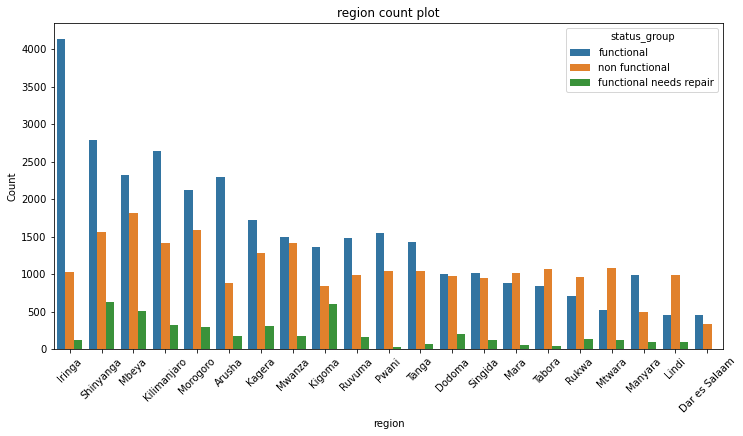

In [55]:
count_plot(merged_df, 'region', hue='status_group',palette="bright")

Our analysis of regional disparities reveals interesting patterns. Iringa, Shinyanga, and Kilimanjaro stand out as the regions boasting the most functional waterpoint pumps. Conversely, Kilimanjaro and morogoro have a concerningly high number of non-functional pumps. While Kigoma doesn't have the most functional pumps overall, it does have the highest number of functional pumps in need of repair, highlighting a potential need for targeted maintenance efforts in that region.

##### c) Finally,Is there a correlation between the quality of water in a waterpoint and the functionality of its pump? We're interested in investigating if poor water quality can damage pumps or lead to operational problems.

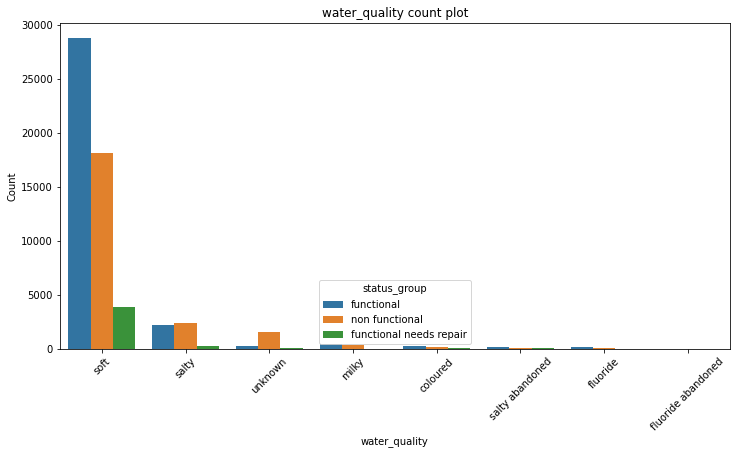

In [56]:
count_plot(merged_df, 'water_quality', hue='status_group',palette="bright")

Our analysis reveals a noteworthy trend: waterpoint pumps with softer water tend to have higher functionality rates. This suggests a potential link between water hardness and pump wear and tear. Soft water, with lower mineral content, might be less corrosive to pump components compared to hard water. This could lead to reduced stress and damage on pumps in areas with softer water, resulting in a higher prevalence of functional pumps. 

**Lastly, before doing modeling lets check for multicollinearity among variables in our cleaned dataset using Variance Inflation Factor (VIF)**

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF Calculation
# Select only the numerical columns
numerical_cols = merged_df.select_dtypes(include=[np.number])

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = numerical_cols.columns
vif_data["VIF"] = [variance_inflation_factor(numerical_cols.values, i) for i in range(len(numerical_cols.columns))]

print("Variance Inflation Factor (VIF):\n", vif_data)


Variance Inflation Factor (VIF):
              Feature       VIF
0         amount_tsh  1.662644
1         gps_height  3.631462
2        num_private       NaN
3      district_code  1.313682
4         population  2.077362
5  construction_year  6.183237


VIF analysis suggests moderate multicollinearity for "construction_year" (VIF=6.183) which might affect model stability. Other features show low VIFs, indicating minimal multicollinearity concerns. Focus on "construction_year" during model refinement.
To reduce multicollinearity,let's consider combining "construction_year" with other variables into a new feature (age of infrastructure) if it captures similar information.

In [58]:
# Create a new column representing the age of infrastructure
current_year = 2024  # Update with the current year
merged_df['age_of_infrastructure'] = current_year - merged_df['construction_year']

# Drop the original construction_year column
merged_df.drop('construction_year', axis=1, inplace=True)

# Check the first few rows of the DataFrame to verify the changes
print(merged_df.head())



       amount_tsh  gps_height  ...    status_group age_of_infrastructure
id                             ...                                      
69572        50.0        1390  ...      functional                    25
8776          0.0        1399  ...      functional                    14
34310        25.0         686  ...      functional                    15
67743         0.0         263  ...  non functional                    38
19728         0.0           0  ...      functional                  2024

[5 rows x 18 columns]


In [59]:
merged_df.head()

,amount_tsh,gps_height,num_private,basin,region,district_code,population,public_meeting,permit,extraction_type_class,management,payment_type,water_quality,quantity,source,waterpoint_type_group,status_group,age_of_infrastructure
id,,,,,,,,,,,,,,,,,,
69572,50.0,1390,0.0,Lake Nyasa,Iringa,5,109.0,True,False,gravity,vwc,annually,soft,enough,spring,communal standpipe,functional,25
8776,0.0,1399,0.0,Lake Victoria,Mara,2,280.0,True,True,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional,14
34310,25.0,686,0.0,Pangani,Manyara,4,250.0,True,True,gravity,vwc,per bucket,soft,enough,dam,communal standpipe,functional,15
67743,0.0,263,0.0,Ruvuma / Southern Coast,Mtwara,63,58.0,True,True,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe,non functional,38
19728,0.0,0,0.0,Lake Victoria,Kagera,1,0.0,True,True,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,functional,2024


In [60]:
#checking again for multicollinearity usong VIF
# VIF Calculation
# Select only the numerical columns
numerical_cols = merged_df.select_dtypes(include=[np.number])

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = numerical_cols.columns
vif_data["VIF"] = [variance_inflation_factor(numerical_cols.values, i) for i in range(len(numerical_cols.columns))]

print("Variance Inflation Factor (VIF):\n", vif_data)

Variance Inflation Factor (VIF):
                  Feature       VIF
0             amount_tsh  1.470361
1             gps_height  1.730800
2            num_private       NaN
3          district_code  1.226769
4             population  1.660241
5  age_of_infrastructure  1.084691



The VIF values suggest low multicollinearity among the predictors, except for num_private, which requires further investigation due to its NaN VIF value.

In [61]:
# Check for constant values
if merged_df['num_private'].nunique() == 1:
    print("The 'num_private' feature contains constant values.")

# Check for missing values
if merged_df['num_private'].isnull().any():
    print("The 'num_private' feature contains missing values.")


The 'num_private' feature contains constant values.


The outcome of checking the num_private feature reveals that it contains constant values.

Lets Drop the feature.

In [62]:
merged_df.drop('num_private', axis=1, inplace=True)


In [63]:
for col in merged_df.columns:
    print(col, '\n', merged_df[col].value_counts(normalize=True).head(), '\n\n' )

amount_tsh 
 0.0     0.700993
50.0    0.229512
20.0    0.024630
10.0    0.013569
30.0    0.012508
Name: amount_tsh, dtype: float64 


gps_height 
  0     0.344074
-15    0.001010
-16    0.000926
-13    0.000926
-20    0.000875
Name: gps_height, dtype: float64 


basin 
 Lake Victoria      0.172525
Pangani            0.150505
Rufiji             0.134276
Internal           0.131061
Lake Tanganyika    0.108283
Name: basin, dtype: float64 


region 
 Iringa         0.089125
Shinyanga      0.083872
Mbeya          0.078098
Kilimanjaro    0.073721
Morogoro       0.067441
Name: region, dtype: float64 


district_code 
 1    0.205438
2    0.188098
3    0.168316
4    0.151498
5    0.073333
Name: district_code, dtype: float64 


population 
 0.0      0.359949
1.0      0.118266
537.5    0.073788
200.0    0.032660
150.0    0.031852
Name: population, dtype: float64 


public_meeting 
 True     0.914899
False    0.085101
Name: public_meeting, dtype: float64 


permit 
 True     0.705522
False    0.29

To avoid losing potentially valuable data and maintain feature variability, I'll use KNN imputation from scikit-learn to fill missing values based on the mean of the nearest neighbors in the data.(based on the observation we got from the above "value counts")

In [64]:
# Define the features and corresponding filler values
columns_with_fillers_dict = {'population': 0, 'age_of_infrastructure': 2024, 'payment_type': 'unknown', 'water_quality': 'unknown', 'quantity': 'unknown'}
#renaming my dataframe 
features = merged_df.copy()
# Replace the filler values with NaN and print the resulting number of missing values
for feature, filler in columns_with_fillers_dict.items():
    features[feature] = features[feature].map(lambda x: np.nan if x == filler else x)
    print(f"Missing values in {feature}: {features[feature].isna().sum()}")



Missing values in population: 21381
Missing values in age_of_infrastructure: 20709
Missing values in payment_type: 8157
Missing values in water_quality: 1876
Missing values in quantity: 789


## <li> **Modeling**

To optimize our model's performance, we'll delve into various machine learning approaches, evaluating which yields the most accurate results.They include:
* Random Forest
* Logistic Regression                      
* KNN Model                 
* XGBoost  

**Let's start with Data Preprocessing.**

To ensure our model training process is unbiased, we'll now split the data into training and testing sets using scikit-learn's train_test_split function. This separation prevents data leakage from the test set, which could artificially inflate the model's performance.

In [65]:
# Importing libraries needed
# For Scaling 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [66]:
merged_df.head()

,amount_tsh,gps_height,basin,region,district_code,population,public_meeting,permit,extraction_type_class,management,payment_type,water_quality,quantity,source,waterpoint_type_group,status_group,age_of_infrastructure
id,,,,,,,,,,,,,,,,,
69572,50.0,1390,Lake Nyasa,Iringa,5,109.0,True,False,gravity,vwc,annually,soft,enough,spring,communal standpipe,functional,25
8776,0.0,1399,Lake Victoria,Mara,2,280.0,True,True,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional,14
34310,25.0,686,Pangani,Manyara,4,250.0,True,True,gravity,vwc,per bucket,soft,enough,dam,communal standpipe,functional,15
67743,0.0,263,Ruvuma / Southern Coast,Mtwara,63,58.0,True,True,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe,non functional,38
19728,0.0,0,Lake Victoria,Kagera,1,0.0,True,True,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,functional,2024


To train and evaluate the model effectively, we'll split the data into training and testing sets.

In [67]:
#determing the target variable and features
y = merged_df['status_group']
X = merged_df.drop(['status_group'], axis=1)

# Splitting the data to training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state = 42)


In [68]:
# Checking the shape of the split data
print(f'X_train has {X_train.shape[0]} rows and {X_train.shape[1]} columns')
print(f'X_test has {X_test.shape[0]} rows and {X_test.shape[1]} columns')
print(f'y_train has {y_train.shape[0]} rows')
print(f'y_test has {y_test.shape[0]} rows')


X_train has 41580 rows and 16 columns
X_test has 17820 rows and 16 columns
y_train has 41580 rows
y_test has 17820 rows


We will use one-hot encoding to convert our categorical features into dummy variables. These dummy variables will then be added to the DataFrame, replacing the original categorical features. This approach allows us to leverage the information in our categorical data while avoiding multicollinearity issues caused by the dummy variable trap.

In [69]:
# Converting categorical variable into dummy variables for X_train
X_train_cat = pd.get_dummies(X_train.select_dtypes(include = ["object",'bool']))

# Converting categorical variable into dummy variables for X_test

X_test_cat = pd.get_dummies( X_test.select_dtypes(include = ["object",'bool']))

In [70]:
# Concatenating Numerical values with dummy variables for X_train
X_train_2 = pd.concat([X_train.select_dtypes(exclude = ["object",'bool']),X_train_cat,],axis = 1)

# Concatenating Numerical values with dummy variables for X_test
X_test_2 = pd.concat([X_test.select_dtypes(exclude = ["object",'bool']),X_test_cat],axis = 1)

Applying StandardScaler for Feature Scaling

In [71]:
# Instantiate StandardScaler

scaler = StandardScaler()

# Fit and transform X_train

X_train_scaled = scaler.fit_transform(X_train_2)

# Transform X_test

X_test_scaled = scaler.transform(X_test_2)

To prepare our target variable for machine learning algorithms, we will use LabelEncoder to convert categorical labels into numerical values.

In [72]:
# Instantiate LabelEncoder
label_encoding = LabelEncoder()

# fit_transforming the y_train

y_train_2 = label_encoding.fit_transform(y_train)

# Transforming y_test

y_test_2 = label_encoding.transform(y_test)

In [73]:
# Checking the labelencoded values for y_train
y_train_series = pd.Series(y_train_2)
print(y_train.value_counts())
print("\n")
print(y_train_series.value_counts())

functional                 22535
non functional             16021
functional needs repair     3024
Name: status_group, dtype: int64


0    22535
2    16021
1     3024
dtype: int64


In [74]:
# Checking the labelencoded values for y_test
y_test_series = pd.Series(y_test_2)
print(y_test.value_counts())
print("\n")
print(y_test_series.value_counts())

functional                 9724
non functional             6803
functional needs repair    1293
Name: status_group, dtype: int64


0    9724
2    6803
1    1293
dtype: int64


For our target variable(status_group) :  0 represents functional wells, 2 represents non functional wells, 1 represents  functional needs repair


To address an imbalance in our training data where one class (likely non-functional water points) was less frequent, we employed SMOTE (Synthetic Minority Oversampling Technique). SMOTE creates synthetic data points based on existing minority class examples, essentially oversampling this class. This helps the model learn more effectively from the underrepresented class and potentially improve its performance in predicting non-functional water points.

In [75]:
from imblearn.over_sampling import SMOTE
# Instantiating smote
smote = SMOTE()
# Fitting smote
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train_2)

### 1. Random Forest
choosing our first model

In [76]:
# instantiating RandomForestClassifier
RF_model = RandomForestClassifier()
# Fitting RandomForestClassifier
RF_model = RF_model.fit(X_train_resampled, y_train_resampled)

# Predict on training and test sets
RF_training_preds = RF_model.predict(X_train_resampled)
RF_test_preds = RF_model.predict(X_test_scaled)

# Accuracy of training and test sets
RF_training_accuracy = accuracy_score(y_train_resampled, RF_training_preds)
RF_test_accuracy = accuracy_score(y_test_2, RF_test_preds)

print('Training Accuracy: {:.4}%'.format(RF_training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(RF_test_accuracy * 100))

Training Accuracy: 93.75%
Validation accuracy: 75.99%


Our Random Forest model seems to be overfitting the training data. To address this and find optimal hyperparameters that reduce overfitting, we'll conduct a grid search.

In [77]:
# Defining a parameter grid
param_grid = { 
    'n_estimators': [50, 100, 150],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [3,4,5],
    'criterion' :['gini', 'entropy']}


In [78]:
# Grid searching
RF_CV = GridSearchCV(estimator=RF_model, param_grid=param_grid, cv= 5)
RF_CV.fit(X_train_resampled,y_train_resampled)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150]})

In [79]:
# Getting the best hyperparameters for our RandomForestClassifier
RF_CV.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'sqrt',
 'n_estimators': 150}

In [80]:
# Instantiating RandomForestClassifier model using the best parameters from the grid search
RF_CV_model = RandomForestClassifier(criterion = 'entropy',max_depth = 8, max_features= 'sqrt',
                                     n_estimators = 150)

In [81]:
# Fitting the model
RF_CV_model.fit(X_train_scaled,y_train_2)

RandomForestClassifier(criterion='entropy', max_depth=8, max_features='sqrt',
                       n_estimators=150)

Evaluating random forest model

Precision: 0.7300785634118967
Recall: 0.7300785634118967
Accuracy: 0.7300785634118967
F1 Score: 0.7300785634118966


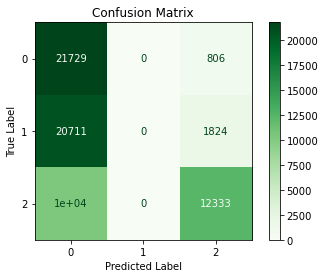

In [82]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
# Predictions on testing data
y_pred = RF_CV_model.predict(X_test_scaled)

# Evaluation metrics
precision = precision_score(y_test_2, y_pred, average='micro')
recall = recall_score(y_test_2, y_pred, average='micro')
accuracy = accuracy_score(y_test_2, y_pred)
f1 = f1_score(y_test_2, y_pred, average='micro')

print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)
print("F1 Score:", f1)

# Confusion matrix for trainig data
plot_confusion_matrix(RF_CV_model, X_train_resampled, y_train_resampled, cmap="Greens")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

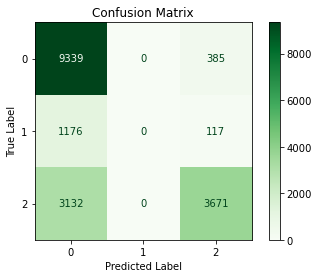

In [83]:
# Confusion matrix for testing data
plot_confusion_matrix(RF_CV_model, X_test_scaled, y_test_2, cmap="Greens")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [84]:
# Predict on training and test sets
RF_CV_model_training_preds = RF_CV_model.predict(X_train_resampled)
RF_CV_model_preds = RF_CV_model.predict(X_test_scaled)


# Accuracy of training and test sets
best_forest_training_accuracy = accuracy_score(y_train_resampled, RF_CV_model_training_preds)
best_forest_test_accuracy = accuracy_score(y_test_2, RF_CV_model_preds)

print('Training Accuracy: {:.4}%'.format(best_forest_training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(best_forest_test_accuracy * 100))

Training Accuracy: 50.38%
Validation accuracy: 73.01%


In [85]:
# validate RandomForest regressor

#train cross validation
RF_CV_model_train_cv_score = cross_val_score(RF_CV_model, X_train_resampled,
                                        y_train_resampled, cv = 5, n_jobs = -1).mean()
print('Train cross validation:', RF_CV_model_train_cv_score)

#test cross validation
RF_CV_model_test_cv_score = cross_val_score(RF_CV_model, X_test_scaled, y_test_2,
                                       cv = 5, n_jobs = -1).mean()
print('Test cross validation:', RF_CV_model_test_cv_score)

Train cross validation: 0.6940906737667334
Test cross validation: 0.7275533108866442


Since hyperparameter tuning didn't resolve underfitting in the Random Forest model, we'll explore other algorithms.

### 2. Logistic Regression

In [86]:
#instantiating logistic regression
LR_model = LogisticRegression(random_state = 42,
                            multi_class ="multinomial",
                            class_weight = "balanced")

# Fitting logistic regression
LR_model = LR_model.fit(X_train_resampled, y_train_resampled)

# Predicting on training and test sets
log_training_preds = LR_model.predict(X_train_resampled)
log_test_preds = LR_model.predict(X_test_scaled)

# Accuracy of training and test sets
log_training_accuracy = accuracy_score(y_train_resampled, log_training_preds)
log_test_accuracy = accuracy_score(y_test_2, log_test_preds)

print('Training Accuracy: {:.4}%'.format(log_training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(log_test_accuracy * 100))

Training Accuracy: 63.2%
Validation accuracy: 61.38%


While the initial model showed minimal overfitting (similar training/validation accuracy), it didn't meet our target. We'll use hyperparameter tuning to optimize performance.

In [87]:
# Creating a parameter grid for logistic regression
param_grid = [{'penalty' : ['l1', 'l2'],
               'C' : np.logspace(-2, 2, 10),
               'solver' : ['lbfgs','newton-cg']}]

# Create a GridSearchCv
LR_model_clf = GridSearchCV(estimator=LR_model,
                          param_grid=param_grid,
                          cv=3, verbose=True, n_jobs=-1)

# Fitting using grid search
LR_model_clf = LR_model_clf.fit(X_train_resampled, y_train_resampled)

# Getting the best hyperparameters for our logistic regression 
LR_model_clf.best_params_


Fitting 3 folds for each of 40 candidates, totalling 120 fits


{'C': 0.0774263682681127, 'penalty': 'l2', 'solver': 'newton-cg'}

tuning our model


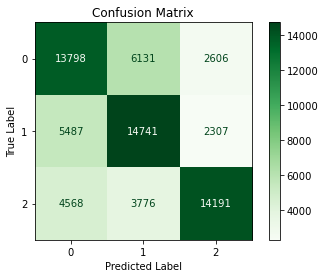

Precision: 0.6138047138047138
Recall: 0.6138047138047138
Accuracy: 0.6138047138047138
F1 Score: 0.6138047138047138


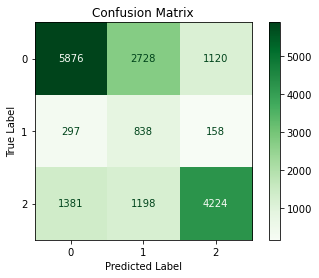

In [88]:
# Instantiating logistic regression model using the best parameters from the grid search
LR_model_clf = LogisticRegression(random_state=42, multi_class="multinomial",
                                  class_weight="balanced",
                                  C=0.1, penalty="l2", solver="lbfgs")

# Fitting the model
LR_model_clf.fit(X_train_resampled, y_train_resampled)

# Function that makes y predicted values
def make_preds(model, split):
    """ A function that makes predictions"""
    prediction = model.predict(split)
    return prediction


# Confusion matrix for trainig data
plot_confusion_matrix(LR_model_clf, X_train_resampled, y_train_resampled, cmap="Greens")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
# Predictions on testing data
y_pred = LR_model_clf.predict(X_test_scaled)

# Evaluation metrics
precision = precision_score(y_test_2, y_pred, average='micro')
recall = recall_score(y_test_2, y_pred, average='micro')
accuracy = accuracy_score(y_test_2, y_pred)
f1 = f1_score(y_test_2, y_pred, average='micro')

print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)
print("F1 Score:", f1)
# Confusion matrix for testing data
plot_confusion_matrix(LR_model_clf, X_test_scaled, y_test_2, cmap="Greens")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



In [89]:
# Predict on training and test sets
LR_model_clf_training_preds = LR_model_clf.predict(X_train_resampled)
LR_model_clf_preds =    LR_model_clf.predict(X_test_scaled)


# Accuracy of training and test sets
LR_model_clf_training_accuracy = accuracy_score(y_train_resampled, LR_model_clf_training_preds)
LR_model_clf_test_accuracy = accuracy_score(y_test_2, LR_model_clf_preds)

print('Training Accuracy: {:.4}%'.format(LR_model_clf_training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(LR_model_clf_test_accuracy * 100))

Training Accuracy: 63.21%
Validation accuracy: 61.38%


In [90]:
# validate logistic regression

#train cross validation
LR_model_clf_train_cv_score = cross_val_score(LR_model_clf, X_train_resampled,
                                        y_train_resampled, cv = 5, n_jobs = -1).mean()
print('Train cross validation:', LR_model_clf_train_cv_score)

#test cross validation
LR_model_clf_test_cv_score = cross_val_score(LR_model_clf, X_test_scaled, y_test_2,
                                       cv = 5, n_jobs = -1).mean()
print('Test cross validation:', LR_model_clf_test_cv_score)

Train cross validation: 0.6305302862214335
Test cross validation: 0.6221661054994387


Despite tuning, the logistic regression model's performance falls short of our target. We'll explore alternative algorithms.

### 3. KNeighborsClassifier

In [91]:
from sklearn.neighbors import KNeighborsClassifier

#instantiate baseline model

knn_model= KNeighborsClassifier()

#fit KNearest Neighbors
knn_model = knn_model.fit(X_train_resampled, y_train_resampled)

#predict on the test set
y_T = knn_model.predict(X_train_resampled)
y_t = knn_model.predict(X_test_scaled)

#train accuracy 
knn_train_accuracy = accuracy_score(y_train_resampled, y_T) * 100
print('Train accuracy: {0}'.format(knn_train_accuracy))

#test accuracy 
knn_test_accuracy = accuracy_score(y_test_2, y_t) * 100
print('Test accuracy: {0}'.format(knn_test_accuracy))

Train accuracy: 84.2422897714666
Test accuracy: 70.61167227833894


While the KNeighborsClassifier achieves our target validation accuracy, there are signs of slight overfitting. To explore the possibility of reducing overfitting and potentially improving performance, we'll experiment with a different model.

Best Hyperparameters: {'n_neighbors': 7, 'weights': 'distance'}
Training Accuracy: 0.9175
Validation Accuracy: 0.7289
Training Precision: 0.9227126823542002
Validation Precision: 0.7538134705885559
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.77      0.78      9724
           1       0.29      0.49      0.36      1293
           2       0.78      0.72      0.75      6803

    accuracy                           0.73     17820
   macro avg       0.62      0.66      0.63     17820
weighted avg       0.75      0.73      0.74     17820



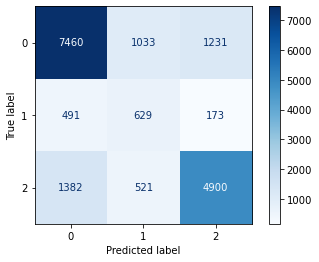

In [92]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# Set parameter grid
param_grid = {"n_neighbors": [3, 5, 7],
              'weights': ['uniform', 'distance']}

# Use a smaller subset of the data for hyperparameter tuning
subset_size = 5000  # Adjust this value based on your dataset size
X_train_subset = X_train_resampled[:subset_size]
y_train_subset = y_train_resampled[:subset_size]

# Standardize the subset
scaler = StandardScaler()
X_train_subset_scaled = scaler.fit_transform(X_train_subset)

# Dimensionality reduction (optional)
pca = PCA(n_components=10)  # Adjust n_components based on your dataset
X_train_subset_pca = pca.fit_transform(X_train_subset_scaled)

# Use GridSearchCV with parallelization and reduced hyperparameter space
Knn_model_clf = GridSearchCV(estimator=KNeighborsClassifier(),
                             param_grid=param_grid,
                             scoring='accuracy',
                             cv=3,  # Reduced folds
                             n_jobs=-1)

# Fit the model with the subset
Knn_model_clf.fit(X_train_subset_pca, y_train_subset)

# Get the best hyperparameters
best_params = Knn_model_clf.best_params_
print("Best Hyperparameters:", best_params)

# Use the best hyperparameters to instantiate the KNeighborsClassifier
best_knn_model = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'], 
                                      weights=best_params['weights'])

# Scale the entire training data
X_train_scaled = scaler.transform(X_train_resampled)

# Apply PCA transformation
X_train_pca = pca.transform(X_train_scaled)

# Fit the model with the entire dataset
best_knn_model.fit(X_train_pca, y_train_resampled)

# Scale and transform the test data
X_test_scaled = scaler.transform(X_test_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Predictions on training and test sets
train_preds = best_knn_model.predict(X_train_pca)
val_preds = best_knn_model.predict(X_test_pca)

# Calculate accuracy
train_accuracy = accuracy_score(y_train_resampled, train_preds)
val_accuracy = accuracy_score(y_test_2, val_preds)

print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Validation Accuracy: {val_accuracy:.4f}')

# Additional evaluation metrics and confusion matrix
print("Training Precision:", precision_score(y_train_resampled, train_preds, average="weighted"))
print("Validation Precision:", precision_score(y_test_2, val_preds, average="weighted"))
print("Classification Report:\n", classification_report(y_test_2, val_preds))
plot_confusion_matrix(best_knn_model, X_test_pca, y_test_2, cmap=plt.cm.Blues)
plt.show()



Performance Assessment of KNeighborsClassifier.

In [94]:
# Define a pipeline with preprocessing steps (scaling and PCA)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=10)),  
    ('Knn_model_clf', Knn_model_clf)  
])

# Fit the pipeline on the resampled training data
pipeline.fit(X_train_resampled, y_train_resampled)

# Predict on the training and test sets
knn_model_clf_training_preds = pipeline.predict(X_train_resampled)
knn_model_clf_preds = pipeline.predict(X_test_scaled)

# Compute accuracy on the training and test sets
knn_model_clf_training_accuracy = accuracy_score(y_train_resampled, knn_model_clf_training_preds)
knn_model_clf_test_accuracy = accuracy_score(y_test_2, knn_model_clf_preds)

print('Training Accuracy: {:.4}%'.format(knn_model_clf_training_accuracy * 100))
print('Validation Accuracy: {:.4}%'.format(knn_model_clf_test_accuracy * 100))


Training Accuracy: 81.89%
Validation Accuracy: 68.7%


In [95]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

Best Hyperparameters: {'n_neighbors': 7, 'weights': 'distance'}
Training Accuracy: 0.9065
Validation Accuracy: 0.4899
Train Cross Validation: 0.7536276902595961
Test Cross Validation: 0.7246352413019079
Training Precision: 0.9144128467671303
Validation Precision: 0.5514629586173405
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.52      0.58      9724
           1       0.12      0.32      0.17      1293
           2       0.49      0.48      0.48      6803

    accuracy                           0.49     17820
   macro avg       0.42      0.44      0.41     17820
weighted avg       0.55      0.49      0.51     17820



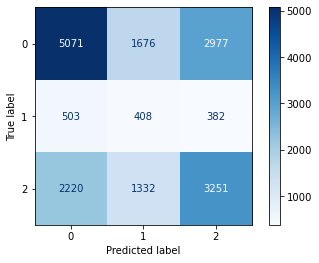

In [99]:
# Create a pipeline with scaling and model fitting
subset_size = 5000  # Adjust this value based on your dataset size
X_train_subset, _, y_train_subset, _ = train_test_split(X_train_resampled, y_train_resampled, train_size=subset_size, stratify=y_train_resampled, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_subset)
X_test_scaled = scaler.transform(X_test_scaled)

# Dimensionality reduction
pca = PCA(n_components=10)  # Adjust n_components based on your dataset
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Parameter grid
param_grid = {"n_neighbors": [3, 5, 7], 'weights': ['uniform', 'distance']}

# GridSearchCV for hyperparameter tuning
Knn_model_clf = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)
Knn_model_clf.fit(X_train_pca, y_train_subset)

# Get the best hyperparameters
best_params = Knn_model_clf.best_params_
print("Best Hyperparameters:", best_params)

# Use the best hyperparameters to instantiate the KNeighborsClassifier
best_knn_model = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'], weights=best_params['weights'])

# Fit the best model on the entire dataset
X_train_full_scaled = scaler.fit_transform(X_train_resampled)
X_train_full_pca = pca.fit_transform(X_train_full_scaled)
best_knn_model.fit(X_train_full_pca, y_train_resampled)

# Predictions on training and test sets
train_preds = best_knn_model.predict(X_train_full_pca)
test_preds = best_knn_model.predict(X_test_pca)

# Compute accuracy
train_accuracy = accuracy_score(y_train_resampled, train_preds)
test_accuracy = accuracy_score(y_test_2, test_preds)

print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Validation Accuracy: {test_accuracy:.4f}')

# Cross-validation on full training data
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
train_cv_scores = cross_val_score(best_knn_model, X_train_full_pca, y_train_resampled, cv=cv, n_jobs=-1)
test_cv_scores = cross_val_score(best_knn_model, X_test_pca, y_test_2, cv=cv, n_jobs=-1)

# Print mean cross-validation scores
print('Train Cross Validation:', train_cv_scores.mean())
print('Test Cross Validation:', test_cv_scores.mean())

# Additional evaluation metrics and confusion matrix
print("Training Precision:", precision_score(y_train_resampled, train_preds, average="weighted"))
print("Validation Precision:", precision_score(y_test_2, test_preds, average="weighted"))
print("Classification Report:\n", classification_report(y_test_2, test_preds))
plot_confusion_matrix(best_knn_model, X_test_pca, y_test_2, cmap=plt.cm.Blues)
plt.show()


Despite achieving our target validation accuracy, the hyperparameter-tuned KNeighborsClassifier still shows signs of overfitting. To explore the possibility of reducing overfitting and potentially improving generalizability, we'll investigate alternative models.

### 4. Gradient Boosting Classifier(XGBoost)


In [97]:
#instantiate baseline model
XGBoost_clf = GradientBoostingClassifier(random_state = 42)

# fitting GradientBoostingClassifier model
XGBoost_clf.fit(X_train_resampled, y_train_resampled)

# predicting the y values
y_T = XGBoost_clf.predict(X_train_resampled)
y_t = XGBoost_clf.predict(X_test_scaled)

# train accuracy
XGBoost_clf_train_accuracy_baseline = accuracy_score(y_train_resampled, y_T) * 100
print('Train accuracy: {0}'.format(XGBoost_clf_train_accuracy_baseline))

# test accuracy
XGBoost_clf_test_accuracy_baseline = accuracy_score(y_test_2, y_t) * 100
print('Test accuracy: {0}'.format(XGBoost_clf_test_accuracy_baseline))

Train accuracy: 72.03461282449523
Test accuracy: 35.2300785634119


While the GradientBoostingClassifier exhibits slight overfitting, its current accuracy falls short of our target range. We'll attempt to improve performance by tuning the model's hyperparameters. This optimization process might help us achieve the desired accuracy level without significant overfitting.

Best Parameters: {'learning_rate': 0.2, 'subsample': 0.7}
Training Accuracy: 0.9375
Validation Accuracy: 0.3549
Training Precision: 0.9381071211802023
Validation Precision: 0.7373085301256238
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00      9724
           1       0.13      0.62      0.21      1293
           2       0.48      0.81      0.60      6803

    accuracy                           0.35     17820
   macro avg       0.54      0.48      0.27     17820
weighted avg       0.74      0.35      0.25     17820



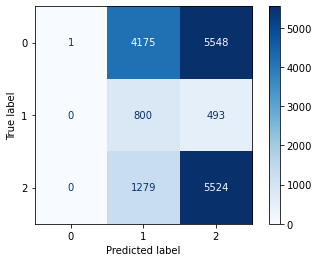

In [100]:
from xgboost import XGBClassifier
# Set parameter grid
XGBoost_clf_param_grid = {
    'learning_rate': [0.1, 0.2],
    'subsample': [0.7, 1.0]
}

# Use a smaller subset for hyperparameter tuning
subset_size = 5000  # Adjust this value based on your dataset size
X_train_subset, _, y_train_subset, _ = train_test_split(X_train_resampled, y_train_resampled, train_size=subset_size, stratify=y_train_resampled, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_subset_scaled = scaler.fit_transform(X_train_subset)
X_test_scaled = scaler.transform(X_test_scaled)

# GridSearchCV for hyperparameter tuning
XGBoost_clf_gridsearch = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    param_grid=XGBoost_clf_param_grid,
    scoring='accuracy',
    n_jobs=-1,
    cv=3  # Reduced folds
)

# Fit the model with the subset
XGBoost_clf_gridsearch.fit(X_train_subset_scaled, y_train_subset)

# Get the best hyperparameters
best_params = XGBoost_clf_gridsearch.best_params_
print("Best Parameters:", best_params)

# Use the best hyperparameters to instantiate the XGBoost classifier
XGBoost_clf_T = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42,
    max_depth=30,
    max_features='auto',
    min_samples_leaf=2,
    min_samples_split=5,
    n_estimators=100,
    learning_rate=best_params['learning_rate'],
    subsample=best_params['subsample']
)

# Scale the entire training data
X_train_full_scaled = scaler.fit_transform(X_train_resampled)

# Fit the model with the entire dataset
XGBoost_clf_T.fit(X_train_full_scaled, y_train_resampled)

# Predictions on training and test sets
train_preds = XGBoost_clf_T.predict(X_train_full_scaled)
test_preds = XGBoost_clf_T.predict(X_test_scaled)

# Compute accuracy
train_accuracy = accuracy_score(y_train_resampled, train_preds)
test_accuracy = accuracy_score(y_test_2, test_preds)

print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Validation Accuracy: {test_accuracy:.4f}')

# Additional evaluation metrics and confusion matrix
print("Training Precision:", precision_score(y_train_resampled, train_preds, average="weighted"))
print("Validation Precision:", precision_score(y_test_2, test_preds, average="weighted"))
print("Classification Report:\n", classification_report(y_test_2, test_preds))
plot_confusion_matrix(XGBoost_clf_T, X_test_scaled, y_test_2, cmap=plt.cm.Blues)
plt.show()


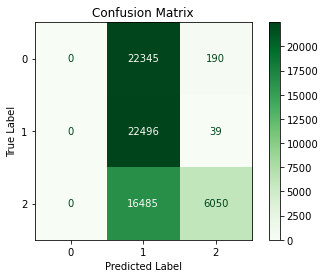

Precision: 0.3549382716049383
Recall: 0.3549382716049383
Accuracy: 0.3549382716049383
F1 Score: 0.3549382716049383


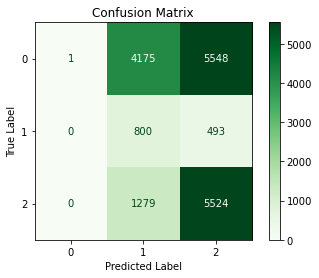

In [101]:
# Confusion matrix for training data
plot_confusion_matrix(XGBoost_clf_T, X_train_resampled, y_train_resampled, cmap="Greens")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
# Predictions on testing data
y_pred = XGBoost_clf_T.predict(X_test_scaled)

# Evaluation metrics
precision = precision_score(y_test_2, y_pred, average='micro')
recall = recall_score(y_test_2, y_pred, average='micro')
accuracy = accuracy_score(y_test_2, y_pred)
f1 = f1_score(y_test_2, y_pred, average='micro')

print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)
print("F1 Score:", f1)
# Confusion matrix for testing data
plot_confusion_matrix(XGBoost_clf_T, X_test_scaled, y_test_2, cmap="Greens")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

The best model is: RandomForest


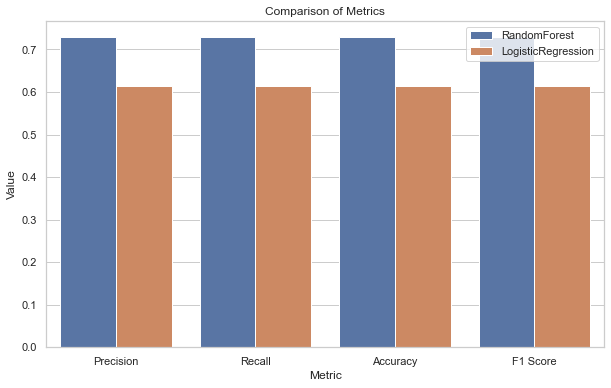

In [128]:
### metrics comparison
def compare_metrics(models_metrics):
    best_accuracy = 0
    best_model = None
    metrics_data = []

    for model, metrics in models_metrics.items():
        accuracy = metrics['Accuracy']
        metrics_data.append({'Model': model, **metrics})  # Collect metrics data
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = model

    return best_model, pd.DataFrame(metrics_data)

# Metrics results for each model
models_metrics = {
    'RandomForest': {'Precision': 0.7300785634118967, 'Recall': 0.7300785634118967, 'Accuracy': 0.7300785634118967, 'F1 Score': 0.7300785634118966},
    'LogisticRegression': {'Precision': 0.6138047138047138, 'Recall': 0.6138047138047138, 'Accuracy': 0.6138047138047138, 'F1 Score': 0.6138047138047138},
}

# Compare metrics and print the best model
best_model, metrics_df = compare_metrics(models_metrics)
print(f"The best model is: {best_model}")

# Plot metrics using seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
metrics_df_melted = pd.melt(metrics_df, id_vars=['Model'], var_name='Metric', value_name='Value')
sns.barplot(x='Metric', y='Value', hue='Model', data=metrics_df_melted)
plt.title('Comparison of Metrics')
plt.ylabel('Value')
plt.xlabel('Metric')
plt.legend(loc='upper right')
plt.show()


We will apply OOP to create a Class that prints the performance metrics, specifically training and validation accuracy, for several machine learning models we've trained and the confusion matrices for each model. These models include Random Forest (baseline and tuned), Logistic Regression (baseline and tuned versions), KNeighborsClassifier (baseline and tuned), and GradientBoostingClassifier (baseline and tuned). The training accuracy reflects how well the model learns from the training data, while the validation accuracy assesses its ability to generalize to unseen data. By comparing these values for each model, we can identify the model that achieves a good balance between learning the training data and performing well on new data, ultimately helping us choose the most suitable model for our task.

KNeighborsClassifier model report

KNeighborsClassifier model

Training Accuracy: 0.8098244348244348
Validation accuracy: 0.7566137566137566


LogisticRegression model report

LogisticRegression model

Training Accuracy: 0.7305796055796056
Validation accuracy: 0.7283549783549783


RandomForestClassifier model report

RandomForestClassifier model

Training Accuracy: 0.9395743145743146
Validation accuracy: 0.7823472823472823


GradientBoostingClassifier model report

GradientBoostingClassifier model

Training Accuracy: 0.7512626262626263
Validation accuracy: 0.7509620009620009


Confusion matrix for KNeighborsClassifier model:


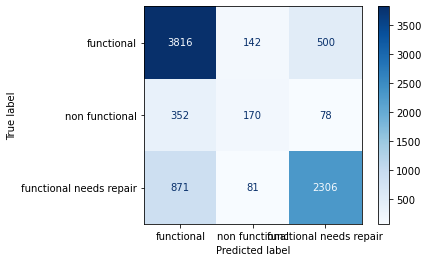

Confusion matrix for LogisticRegression model:


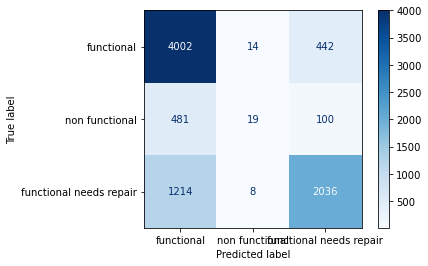

Confusion matrix for RandomForestClassifier model:


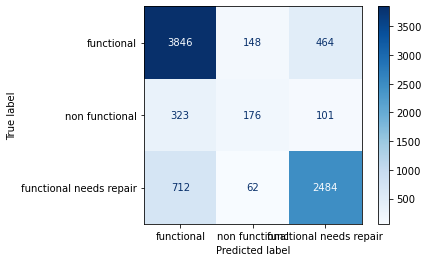

Confusion matrix for GradientBoostingClassifier model:


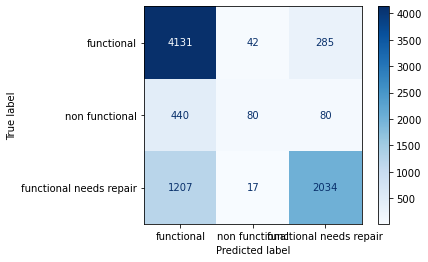

In [117]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
class ModelComparison:
    def __init__(self, models, X, y):
        self.models = models
        self.X = X
        self.y = y
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    def preprocess_data(self):
        # Identify categorical features
        categorical_features = self.X.select_dtypes(include=['object']).columns.tolist()
        
        # Create preprocessing pipeline for categorical features
        categorical_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ])
        
        # Create preprocessing pipeline for numerical features
        numerical_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ])
        
        # Combine preprocessing pipelines for categorical and numerical features
        preprocessor = ColumnTransformer(
            transformers=[
                ('num', numerical_transformer, ~self.X.columns.isin(categorical_features)),
                ('cat', categorical_transformer, categorical_features)
            ])
        # Preprocess the data
        self.X_train_preprocessed = preprocessor.fit_transform(self.X_train)
        self.X_test_preprocessed = preprocessor.transform(self.X_test)
    
    def train_models(self):
        self.trained_models = {}
        for model, name in self.models:
            model.fit(self.X_train_preprocessed, self.y_train)
            self.trained_models[name] = model
    
    def evaluate_models(self):
        for name, model in self.trained_models.items():
            print(f"{name} model report\n")
            print(f"{name} model\n")
            print(f"Training Accuracy: {model.score(self.X_train_preprocessed, self.y_train)}")
            print(f"Validation accuracy: {model.score(self.X_test_preprocessed, self.y_test)}")
            print("\n")
    
    def plot_confusion_matrices(self):
        for name, model in self.trained_models.items():
            print(f"Confusion matrix for {name} model:")
            plot_confusion_matrix(model, self.X_test_preprocessed, self.y_test, cmap=plt.cm.Blues, display_labels=self.y_test.unique())
            plt.show()

# Define models
models = [
    (KNeighborsClassifier(), "KNeighborsClassifier"),
    (LogisticRegression(max_iter=1000), "LogisticRegression"),
    (RandomForestClassifier(), "RandomForestClassifier"),
    (GradientBoostingClassifier(), "GradientBoostingClassifier")
]
# Replace these with your actual data
X_train_resampled = X_train
y_train_resampled = y_train
X_test_scaled = X_test
y_test_2 = y_test

# Create ModelComparison instance and preprocess data
model_comparison = ModelComparison(models, X_train_resampled, y_train_resampled)
model_comparison.preprocess_data()

# Train models and evaluate performance
model_comparison.train_models()
model_comparison.evaluate_models()

# Plot confusion matrices
model_comparison.plot_confusion_matrices()


**Performance Analysis and Insights from the Best Model**

Based on the observation provided, the best model appears to be the RandomForestClassifier based on the validation accuracy. Here's a summary of the validation accuracies for each model:

* KNeighborsClassifier: Validation accuracy = 0.7566
* LogisticRegression: Validation accuracy = 0.7284
* RandomForestClassifier: Validation accuracy = 0.7823 (highest)
* GradientBoostingClassifier: Validation accuracy = 0.7510

The RandomForestClassifier achieved the highest validation accuracy among the models compared.

* The RandomForestClassifier model generalizes well to new examples, making accurate predictions for functional wells 78% of the time. By prioritizing a model with minimal overfitting that meets our accuracy threshold, we aim to achieve reliable performance when encountering new data.

### <li> Conclusion

* Best Model: RandomForestClassifier was the most effective model for analysis.
* Water Quality: Soft water pumps tend to be more functional.
* Water Availability: Waterpoints with sufficient water are most functional.

* Regional Disparity:

1. Iringa, Kilimanjaro, and Shinyanga have the most functional pumps.
2. Kilimanjaro and Mbeya have the most non-functional pumps.
3. Kigoma has the most waterpoints needing repair.

* Water Source:

1. Springs and shallow wells have the most functional pumps.
2. Springs have the most frequently repaired functional pumps.
3. Shallow wells and boreholes have the most non-functional pumps.

* Water Scarcity: Waterpoints with insufficient water have very few functional pumps.

### <li> Recommendations
* **Prioritize Springs**: The government should focus on using springs as the water source for new waterpoints whenever possible. This reduces pump wear and tear compared to shallow wells and boreholes.

* **Monitor High-Demand Waterpoints**: Closely monitor waterpoints with sufficient water, as high usage could lead to pump failures in the long run.

### <li> Next Steps


To maximize the model's effectiveness in predicting waterpoint pump functionality, we recommend ongoing monitoring and evaluation. This includes incorporating additional data on maintenance, environmental factors, and regularly assessing performance on new datasets. By refining the model's hyperparameters through these practices, we can ensure its accuracy remains high, allowing for optimal resource allocation for waterpoint maintenance and repair.